## Particle Swarm Algorithm (PSO)

### Import all the necessary libraries

In [1]:
import csv
import numpy as np
import pandas as pd

### Declaring a Particle Class

In [8]:
class Particle:
    def __init__(self, num_clusters, num_features):
        self.position = np.random.rand(num_clusters, num_features)
        self.velocity = np.random.rand(num_clusters, num_features)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

### Defining the fitness Function
$$ min \ f = \sum_{j=1}^K \sum_{x_{i}\epsilon C_{j}} || x_{j}-\mu_{j}||^2 $$

In [63]:
def fitness_function(data, particles, num_clusters):
    distances = np.zeros((len(data), num_clusters))


    for i, particle in enumerate(particles):
        for j in range(num_clusters):
            
            distances[:, j] = np.linalg.norm(data - particle.position[j], axis=1)
            # print(distances)

        particle_fitness = np.sum(np.min(distances, axis=1))
        
        if particle_fitness < particle.best_fitness:
            particle.best_fitness = particle_fitness
            particle.best_position = particle.position.copy()

    return particles

### Updating the position of particle

In [64]:
def update_velocity_position(particles, inertia, c1, c2, global_best_position):
    for particle in particles:
        inertia_term = inertia * particle.velocity
        cognitive_term = c1 * np.random.rand() * (particle.best_position - particle.position)
        social_term = c2 * np.random.rand() * (global_best_position - particle.position)

        particle.velocity = inertia_term + cognitive_term + social_term
        particle.position = particle.position + particle.velocity

### Initializing the particles 

In [65]:
def initialize_particles(num_particles, num_clusters, num_features):
    particles = [Particle(num_clusters, num_features) for _ in range(num_particles)]
    return particles

In [76]:
# Load your data and set parameters
data = np.loadtxt("./data/wikipedia_td.txt")
num_particles = 30
num_clusters = 10
num_features = data.shape[1]
max_iterations = 100
inertia = 0.5
c1 = 2.0
c2 = 2.0




# Initialize particles
particles = initialize_particles(num_particles, num_clusters, num_features)
global_best_position = None
global_best_fitness = float('inf')


### Runing the PSO

In [77]:
# PSO Main Loop
for iteration in range(max_iterations):
    particles = fitness_function(data, particles, num_clusters)
    
    
    # Update global best
    for particle in particles:
        if particle.best_fitness < global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = particle.best_position.copy()

    # Update particles' velocity and position
    update_velocity_position(particles, inertia, c1, c2, global_best_position)

### Printing Top 10 words

In [79]:
dictionary_path = "./data/dictionary.csv" 
dictionary = {}

with open(dictionary_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, word in enumerate(reader):
        dictionary[index] = word[0]

# print(global_best_position.shape)
# print(global_best_fitness)

sorted_indices = np.argsort(-global_best_position, axis=1)
# print(sorted_indices)
top_words = [[dictionary[idx] for idx in row[:10]] for row in sorted_indices]
print("Top words for each cluster:")
for cluster_index, words in enumerate(top_words):
    print(f"Cluster {cluster_index + 1}: {', '.join(words)}")



(10, 500)
Top words for each cluster:
Cluster 1: finish, initial, regular, able, san, war, true, york, peter, summer
Cluster 2: business, war, miss, government, account, guest, discuss, fire, prove, seek
Cluster 3: serve, los, annual, play, reach, initial, receive, control, prove, indicate
Cluster 4: overall, release, official, rank, red, park, refer, country, introduce, eventually
Cluster 5: authority, history, article, effect, effort, website, cite, attack, portray, sale
Cluster 6: department, san, character, practice, online, reveal, couple, song, magazine, inspire
Cluster 7: critic, represent, display, audience, studio, episode, david, separate, position, associate
Cluster 8: george, credit, love, wear, original, music, east, legal, civil, richard
Cluster 9: subsequently, producer, union, professional, promote, final, loss, wear, europe, honor
Cluster 10: picture, particularly, challenge, host, grow, video, peter, meeting, able, girl


### Printing the Top 10 titles

In [8]:
titles_path = "./data/titles.csv" 
titles = {}

with open(titles_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, title in enumerate(reader):
        titles[index] = title[0]


In [9]:
sorted_indices = np.argsort(-global_best_position, axis=0)
top_titles = [[titles[idx] for idx in row[:10]] for row in sorted_indices]
print("Top 10 titles for each cluster:")
for cluster_index, titles in enumerate(top_titles):
    print(f"Cluster {cluster_index + 1}: {', '.join(titles)}")

Top 10 titles for each cluster:
Cluster 1: Beyonce, Keanu_Reeves, Lisa_Brennan-Jobs, Beyonce, Coachella_Valley_Music_and_Arts_Festival, Charlie_Sheen, Charlie_Sheen, Charlie_Sheen, Lisa_Brennan-Jobs, Beyonce
Cluster 2: Lisa_Brennan-Jobs, Negan, Charlie_Sheen, Unfinished_portrait_of_Franklin_D._Roosevelt, Beyonce, Crimson_Peak, Crimson_Peak, Keanu_Reeves, Charlie_Sheen, Rodrigo_Duterte
Cluster 3: Rodrigo_Duterte, Beyonce, Rodrigo_Duterte, Charlie_Sheen, Negan, Lisa_Brennan-Jobs, Keanu_Reeves, Lisa_Brennan-Jobs, Cam_Newton, Keanu_Reeves
Cluster 4: Unfinished_portrait_of_Franklin_D._Roosevelt, Cam_Newton, Unfinished_portrait_of_Franklin_D._Roosevelt, Negan, Charlie_Sheen, Cam_Newton, Coachella_Valley_Music_and_Arts_Festival, Negan, Unfinished_portrait_of_Franklin_D._Roosevelt, Negan
Cluster 5: Charlie_Sheen, Coachella_Valley_Music_and_Arts_Festival, Cam_Newton, Lisa_Brennan-Jobs, Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Festival, Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Fe

### Graph for different iterations 100, 500 and 1000

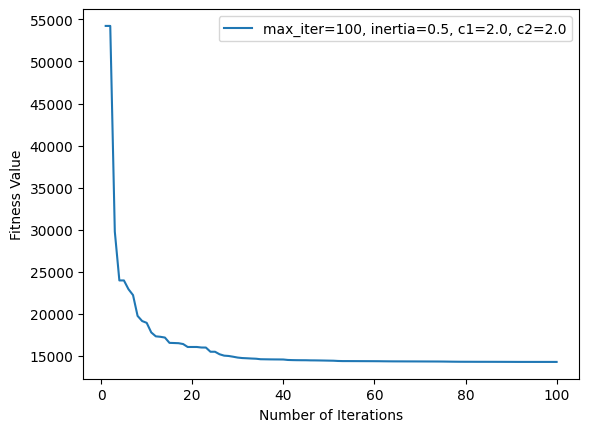

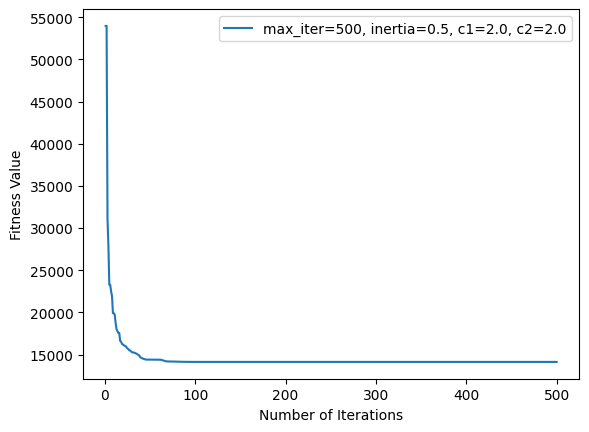

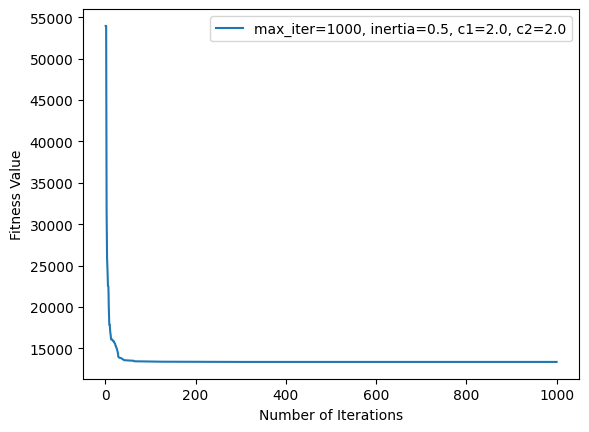


Best Results:
                max_iterations  inertia   c1   c2  best_fitness
max_iterations                                                 
100                      100.0      0.5  2.0  2.0  14290.070411
500                      500.0      0.5  2.0  2.0  14132.008467
1000                    1000.0      0.5  2.0  2.0  13348.611776


In [22]:
import matplotlib.pyplot as plt
# Experiment with different maximum iteration values (100, 500, 1000)
max_iterations_values = [100,500,1000]

# Experiment with different parameter values
inertia_values = [0.5]
c1_values = [2.0]
c2_values = [2.0]

# Collect results for plotting
results = []

for max_iterations in max_iterations_values:
    for inertia in inertia_values:
        for c1 in c1_values:
            for c2 in c2_values:
                # Initialize particles
                particles = initialize_particles(num_particles, num_clusters, num_features)
                global_best_position = None
                global_best_fitness = float('inf')
                fitness_history = []

                # PSO Main Loop
                for iteration in range(max_iterations):
                    particles = fitness_function(data, particles, num_clusters)

                    # Update global best
                    for particle in particles:
                        if particle.best_fitness < global_best_fitness:
                            global_best_fitness = particle.best_fitness
                            global_best_position = particle.best_position.copy()

                    fitness_history.append(global_best_fitness)

                    # Update particles' velocity and position
                    update_velocity_position(particles, inertia, c1, c2, global_best_position)

                # Store the results for this combination of parameters
                results.append({
                    'max_iterations': max_iterations,
                    'inertia': inertia,
                    'c1': c1,
                    'c2': c2,
                    'best_fitness': global_best_fitness
                })
                # Plot fitness vs number of iterations
                plt.plot(range(1, max_iterations + 1), fitness_history, label=f"max_iter={max_iterations}, inertia={inertia}, c1={c1}, c2={c2}")
                plt.xlabel('Number of Iterations')
                plt.ylabel('Fitness Value')
                plt.legend()
                plt.show()



# Find the best result for each algorithm
best_results_df = pd.DataFrame(results)
best_results = best_results_df.groupby('max_iterations').apply(lambda x: x.loc[x['best_fitness'].idxmin()])

print("\nBest Results:")
print(best_results[['max_iterations', 'inertia', 'c1', 'c2', 'best_fitness']])


## GREY WOLF OPTIMIZATION (GWO)

### Grey Wolf Class

In [80]:
import numpy as np
import pandas as pd

class GreyWolf:
    def __init__(self, num_clusters, num_features):
        self.position = np.random.rand(num_clusters, num_features)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

### Fitness function defined

In [81]:
def gwo_fitness_function(data, wolves, num_clusters):
    distances = np.zeros((len(data), num_clusters))

    for i, wolf in enumerate(wolves):
        for j in range(num_clusters):
            distances[:, j] = np.linalg.norm(data - wolf.position[j], axis=1)

        wolf_fitness = np.sum(np.min(distances, axis=1))

        if wolf_fitness < wolf.best_fitness:
            wolf.best_fitness = wolf_fitness
            wolf.best_position = wolf.position.copy()

    return wolves

### Update GWO position

In [82]:
def gwo_update_position(wolves, a, num_clusters):
    alpha, beta, delta = wolves[0], wolves[1], wolves[2]

    for wolf in wolves:
        r1, r2 = np.random.rand(), np.random.rand()
        A1, A2, A3 = 2 * a * r1 - a, 2 * a * r2 - a, 2 * r2

        D_alpha = np.abs(A1 * alpha.position - wolf.position)
        D_beta = np.abs(A2 * beta.position - wolf.position)
        D_delta = np.abs(A3 * delta.position - wolf.position)

        X1 = alpha.position - A1 * D_alpha
        X2 = beta.position - A2 * D_beta
        X3 = delta.position - A3 * D_delta

        wolf.position = (X1 + X2 + X3) / 3

### Initializing GWO

In [83]:
def gwo_initialize_wolves(num_wolves, num_clusters, num_features):
    wolves = [GreyWolf(num_clusters, num_features) for _ in range(num_wolves)]
    return wolves

In [84]:
# Load your data and set parameters
data = np.loadtxt("./data/wikipedia_td.txt")
num_wolves = 30  # Number of wolves in the GWO algorithm
num_clusters = 10
num_features = data.shape[1]
max_iterations = 100
a = 2.0  # Parameter for GWO algorithm

# Initialize wolves
wolves = gwo_initialize_wolves(num_wolves, num_clusters, num_features)

In [85]:
# GWO Main Loop
for iteration in range(max_iterations):
    wolves = gwo_fitness_function(data, wolves, num_clusters)

    # Update wolves' positions
    gwo_update_position(wolves, a, num_clusters)

In [86]:
# Retrieve the best wolf's position
global_best_position = wolves[np.argmin([wolf.best_fitness for wolf in wolves])].best_position


# Load dictionary from CSV file
dictionary_path = "./data/dictionary.csv" 
dictionary = {}

with open(dictionary_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, word in enumerate(reader):
        dictionary[index] = word[0]


In [87]:
# Print the words corresponding to the top 10 entries of the global best position
sorted_indices = np.argsort(-global_best_position, axis=1)
top_words = [[dictionary[idx] for idx in row[:10]] for row in sorted_indices]
print("Top words for each cluster (GWO):")
for cluster_index, words in enumerate(top_words):
    print(f"Cluster {cluster_index + 1}: {', '.join(words)}")


Top words for each cluster (GWO):
Cluster 1: accept, spend, establish, america, participate, addition, reviews, system, intend, mixed
Cluster 2: officer, front, union, experience, fail, hour, enter, location, fifth, overall
Cluster 3: actor, artist, numerous, throw, decision, top, ground, premier, london, week
Cluster 4: largest, body, idea, san, church, attempt, immediately, moment, city, train
Cluster 5: prevent, king, australia, central, reveal, element, effort, art, issue, scene
Cluster 6: range, deliver, official, injury, church, match, battle, article, girl, mixed
Cluster 7: build, rest, department, shoot, announce, hear, letter, cover, available, moment
Cluster 8: pay, feel, level, player, government, ultimately, cause, team, former, performance
Cluster 9: arrest, attempt, bill, avoid, plan, hear, happen, reveal, shoot, mixed
Cluster 10: appear, figure, season, honor, english, discuss, community, stage, lead, watch


In [88]:
# Load titles from CSV file
titles_path = "./data/titles.csv" 
titles_df = pd.read_csv(titles_path, header=None, names=['Titles'])

In [ ]:
import csv

titles_path = "./data/titles.csv"  
titles = {}

with open(titles_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, title in enumerate(reader):
        titles[index] = title[0]

sorted_indices = np.argsort(-global_best_position, axis=0)
top_titles = [[titles[idx] for idx in row[:10]] for row in sorted_indices]
print("Top 10 titles for each cluster:")
for cluster_index, cluster_titles in enumerate(top_titles):
    print(f"Cluster {cluster_index + 1}: {', '.join(cluster_titles)}")


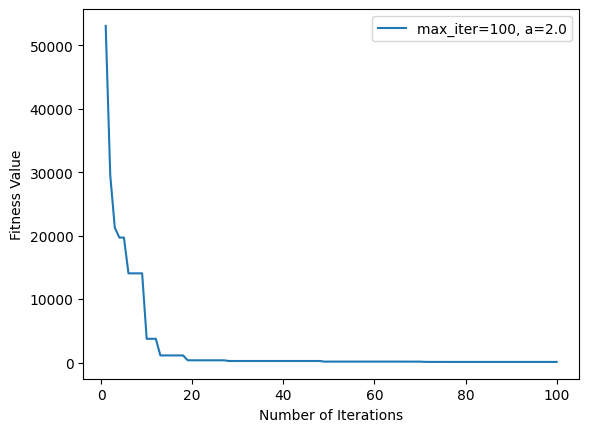

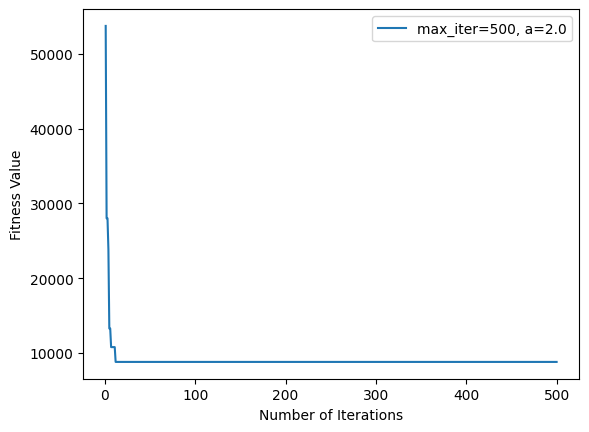

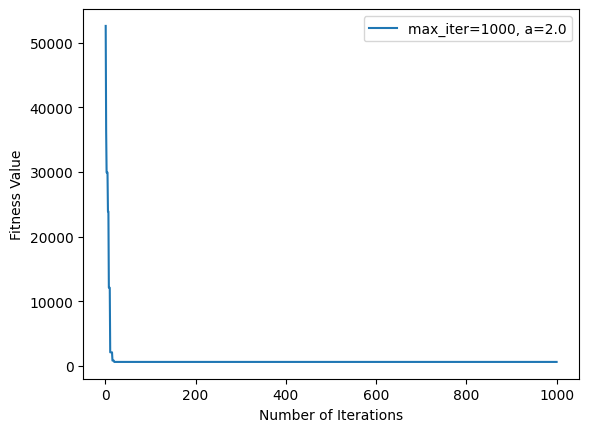


Best Results for GWO:
max_iterations    100.000000
a                   2.000000
best_fitness       92.425667
Name: 0, dtype: float64


In [93]:
# Function to get the best result from wolves
def get_best_result(wolves):
    best_wolf = min(wolves, key=lambda wolf: wolf.best_fitness)
    return best_wolf.best_fitness

# Experiment with different maximum iteration values (100, 500, 1000)
max_iterations_values = [100, 500, 1000]

num_wolves = 30  # Number of wolves in the GWO algorithm
num_clusters = 10
# Experiment with different parameter values
a_values = [2.0]

# Collect results for plotting
results_gwo = []

for max_iterations in max_iterations_values:
    for a in a_values:
        # Initialize wolves
        wolves = gwo_initialize_wolves(num_wolves, num_clusters, num_features)
        fitness_history_gwo = []

        # GWO Main Loop
        for iteration in range(max_iterations):
            wolves = gwo_fitness_function(data, wolves, num_clusters)

            # Update wolves' positions
            gwo_update_position(wolves, a, num_clusters)

            # Record fitness values
            fitness_values = [wolf.best_fitness for wolf in wolves]
            fitness_history_gwo.append(min(fitness_values))

        # Get the best fitness value for this combination of parameters
        best_fitness_gwo = min(fitness_history_gwo)

        # Store the results for this combination of parameters
        results_gwo.append({
            'max_iterations': max_iterations,
            'a': a,
            'best_fitness': best_fitness_gwo
        })

        # Plot fitness vs number of iterations
        plt.plot(range(1, max_iterations + 1), fitness_history_gwo, label=f"max_iter={max_iterations}, a={a}")
        plt.xlabel('Number of Iterations')
        plt.ylabel('Fitness Value')
        plt.legend()
        plt.show()

# Find the best result for GWO
best_results_gwo_df = pd.DataFrame(results_gwo)
best_result_gwo = best_results_gwo_df.loc[best_results_gwo_df['best_fitness'].idxmin()]

print("\nBest Results for GWO:")
print(best_result_gwo[['max_iterations', 'a', 'best_fitness']])